In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [314]:
df = pd.read_csv("bengaluru_house_prices.csv")
df.shape

(13320, 9)

In [315]:
df = df.drop(['area_type','society','balcony','availability'],axis=1)
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [316]:
#data cleaning
df.isnull().sum()
df=df.dropna() #rows with null values are less so can drop easily

In [317]:
#feaature engineering - adding new feature
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [318]:
df = df[df['bhk'] <= 10]


In [319]:
#convert to float
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True 
df['total_sqft'] = df['total_sqft'].apply(lambda x: float(x) if is_float(x) else x)
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [320]:
type(df.loc[0, 'total_sqft'])
type(df.loc[30, 'total_sqft'])
type(df.loc[410, 'total_sqft'])

str

In [321]:
def convert_sqft_to_num(x):
    if isinstance(x, str):  # Only proceed if x is a string
        tokens = x.split("-")
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1])) / 2
    elif isinstance(x, float):  # If x is already a float, just return it
        return x
    return None  # Return None if x is not a string or float

df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)


In [322]:
df.loc[30]
df.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [323]:
#feature engineering 
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [324]:
#dimensionality reduction
df.location = df.location.apply(lambda x: x.strip())
location_stats = df['location'].value_counts(ascending=False)
location_stats

location
Whitefield                          535
Sarjapur  Road                      392
Electronic City                     304
Kanakpura Road                      266
Thanisandra                         236
                                   ... 
Housing Board Layout Vijay Nagar      1
Marathalli bridge                     1
Papareddipalya                        1
K R C kothanur                        1
Abshot Layout                         1
Name: count, Length: 1284, dtype: int64

In [325]:
len(location_stats[location_stats>10])

241

In [326]:
len(location_stats[location_stats<=10])

1043

In [327]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Dairy Circle                        10
Kalkere                             10
Sadashiva Nagar                     10
Naganathapura                       10
Basapura                            10
                                    ..
Housing Board Layout Vijay Nagar     1
Marathalli bridge                    1
Papareddipalya                       1
K R C kothanur                       1
Abshot Layout                        1
Name: count, Length: 1043, dtype: int64

In [328]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df.location.unique())

242

In [329]:
df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [330]:
#outlier remover
df[df.total_sqft/df.bhk<300].head()
df.shape

(13234, 7)

In [331]:
df=df[~(df.total_sqft/df.bhk<300)]
df.shape

(12498, 7)

In [332]:
df.bath.unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 14., 12., 10., 13.])

In [333]:
df=df[df.bath<8]
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


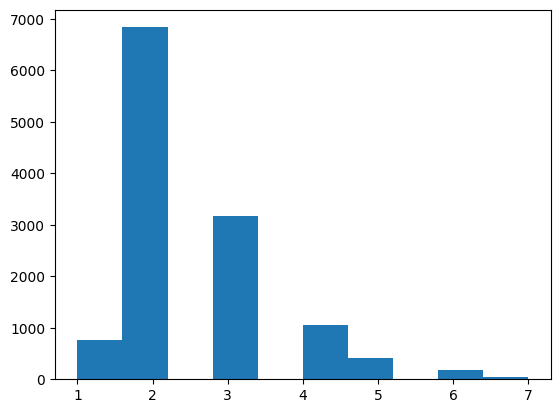

In [334]:
plt.hist(df.bath)
plt.show()

In [335]:
df[df.bath>df.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7709,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
9974,other,3 Bedroom,2400.0,6.0,775.0,3,32291.666667
12103,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [336]:
df=df[df.bath<df.bhk+2]
df.shape

(12310, 7)

In [337]:
#train
df = df.drop(['size','price_per_sqft'],axis=1) #these two for outlier removal only
df.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [338]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12310 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12310 non-null  object 
 1   total_sqft  12266 non-null  float64
 2   bath        12310 non-null  float64
 3   price       12310 non-null  float64
 4   bhk         12310 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 577.0+ KB


In [339]:
dummies=pd.get_dummies(df.location)

In [340]:
df = pd.concat([df,dummies.drop('other',axis=1)],axis=1)
df.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,1056.0,2.0,39.07,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Chikka Tirupathi,2600.0,5.0,120.00,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Uttarahalli,1440.0,2.0,62.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Lingadheeranahalli,1521.0,3.0,95.00,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Kothanur,1200.0,2.0,51.00,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [341]:
df = df.drop('location',axis=1)
df.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,39.07,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,120.00,4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,62.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,95.00,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,51.00,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [342]:
df.isnull().sum()
df=df.dropna()
df.isnull().sum()

total_sqft             0
bath                   0
price                  0
bhk                    0
1st Block Jayanagar    0
                      ..
Yelachenahalli         0
Yelahanka              0
Yelahanka New Town     0
Yelenahalli            0
Yeshwanthpur           0
Length: 245, dtype: int64

In [343]:
#build model
x = df.drop('price',axis=1)
y=df['price']
x

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1056.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1440.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,3453.0,4.0,5,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
13316,3600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13317,1141.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
13318,4689.0,4.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [344]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=10)


In [345]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.42968487750042506

In [346]:
#cross val
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(model,x,y,cv=cv)

array([0.4760004 , 0.55179643, 0.56869942, 0.50287304, 0.48963693])

In [347]:
#grid search cv
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


In [348]:
def best_model(x,y):
    algos = {
        'linear_reg': {
            'model': LinearRegression(),
            'params':{
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model': DecisionTreeRegressor(),
            'params':{
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    for algo, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model':algo,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score','best_params'])

In [349]:
best_model(x,y)

C:\Users\ajeet\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ajeet\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ajeet\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ajeet\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    validat

,model,best_score,best_params
0,linear_reg,0.517801,{'fit_intercept': True}
1,lasso,0.476533,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.421586,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [357]:
def predict_price(location, sqft, bath, bhk):
    feature_names = model.feature_names_in_
    loc_col_idx = np.where(feature_names==location)[0][0]

    f = np.zeros(len(feature_names))
    f[0] = sqft
    f[1] = bath
    f[2] = bhk
    if loc_col_idx >= 0:
        f[loc_col_idx] = 1
    return model.predict([f])[0]

In [359]:
predict_price('Indira Nagar', 1000, 3, 3)

C:\Users\ajeet\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


263.0720426621532

In [361]:
# Used for serializing and saving Python objects (like machine learning models, lists, dictionaries, etc.) to a file.
# Allows the saved object to be loaded later without retraining or recreating it.


import pickle
with open('banglore_home_prices_model.pickle','wb') as n:
    pickle.dump(model,n)

In [362]:
# Stores data in a text-based, human-readable format.
# Ideal for structured data like configurations, feature names, or settings.
# Language-independent: Can be used across different programming languages.


import json
columns = {
    'data_columns': [col.lower() for col in x.columns]
}
with open("columns.json",'w') as b:
    b.write(json.dumps(columns))

In [ ]:
#flask server - serve http request made by the ui/ backend for website